In [34]:
import numpy as n
import matplotlib.pyplot as mtp
from matplotlib.colors import ListedColormap as lc 
import pandas as pd 
from sklearn.preprocessing import StandardScaler as ss 
from sklearn.model_selection import train_test_split as tts 
from sklearn.naive_bayes import GaussianNB as gn
from sklearn.metrics import confusion_matrix as c 

In [35]:
# Dataset to determine the effect of Glucose and BP on diabates  
df = pd.read_csv("Diabates.csv")
df.head(5)

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [36]:
X = df.iloc[:,[0,1]].values
y = df.iloc[:,2].values

In [37]:
X_train,X_test , y_train , y_test = tts(X,y,random_state=4)

In [38]:
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
cl = gn()
cl.fit(X_train,y_train)

GaussianNB()

In [40]:
y_pred = cl.predict(X_test)
print(y_pred)

[0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1
 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1
 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1
 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1
 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0
 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1
 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1]


In [41]:
cm = c(y_test,y_pred)
print(cm)

[[113   9]
 [  6 121]]


In [50]:
X_set , y_set = X_train , y_train
X1,X2 = n.meshgrid(n.arange(start= X_set[:,0].min()-1,
                            stop=X_set[:,0].max()+1,
                            step = 0.01),
                   n.arange(start= X_set[:,1].min()-1,
                            stop=X_set[:,1].max()+1,
                            step = 0.01))
Z = cl.predict(n.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

/var/folders/ys/f1dtzjmj589424_wn9_wp8t80000gn/T/ipykernel_84491/1232038868.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


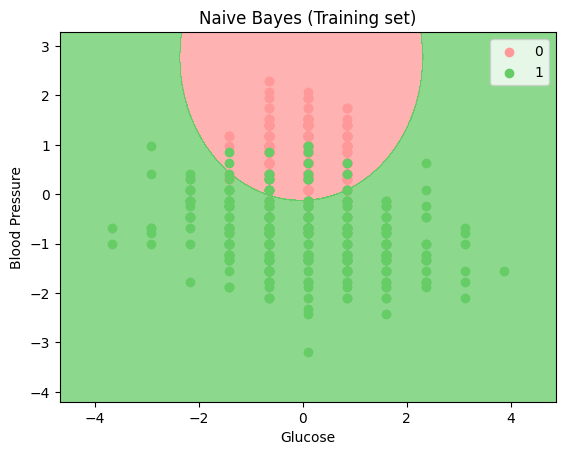

In [46]:
cmap = lc(['#FF9999', '#66CC66'])
mtp.contourf(X1, X2, Z, alpha=0.75, cmap=cmap)

# Setting plot limits and labels
mtp.xlim(X1.min(), X1.max())
mtp.ylim(X2.min(), X2.max())

# Plotting the actual data points with different colors for different classes
for i, j in enumerate(n.unique(y_set)):
    mtp.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=cmap(i), label=j)

mtp.title('Naive Bayes (Training set)')
mtp.xlabel('Glucose')
mtp.ylabel('Blood Pressure')
mtp.legend()
mtp.show()